In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Checking numpy version (1.26.4), as fast.ai does not work for higher numpy versions

In [2]:
print(np.__version__)

1.26.4


* Check if the script running on Kaggle
* Install/Update fastai for all updated funstions and libraries

In [3]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    # Code that runs only on Kaggle
    print("Running on Kaggle")
    !pip install -Uqq fastai
else:
    # Code that runs elsewhere (like local Jupyter, Colab, etc.)
    print("Not running on Kaggle")

Running on Kaggle
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━

Installing duckduckgo_search python library

In [4]:
!pip install -Uqq ddgs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 44.3 MB/s eta 0:00:00


4 categories are created to collect the images into separate directories in the next step

In [5]:
from pathlib import Path
categories = ['human', 'animal', 'plant', 'inanimate']

path = Path('ImageClassifier')

for cat in categories:
    (path/cat).mkdir(parents=True, exist_ok=True)

In [6]:
#Some images might fail, ignore the warnings

from ddgs import DDGS
from fastcore.all import *
from fastai.vision.utils import download_images, resize_images
import time

def search_images(keywords, max_images=150):
    return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

from fastdownload import download_url

for cat in categories:
    dest = path/cat
    urls = search_images(f"{cat} photo", max_images=150)
    download_images(dest, urls=urls)
    time.sleep(10)  # avoid getting blocked
    resize_images(dest, max_size=400)  # resize for speed

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  war

In [7]:
#Removing the failed images

from fastai.vision.all import *

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


(#24) [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None...]

input:ImageBlock, output:CategoryBlock  
Splitter: splits the data into training set and validation set, 30% training, 70% validation  
seed=42 ensures the split is reproducible; same random split every time  
.dataloaders(path, bs=32): takes the image folders under path, prepare batches of size 32, and return a DataLoaders object ready for training and validation.

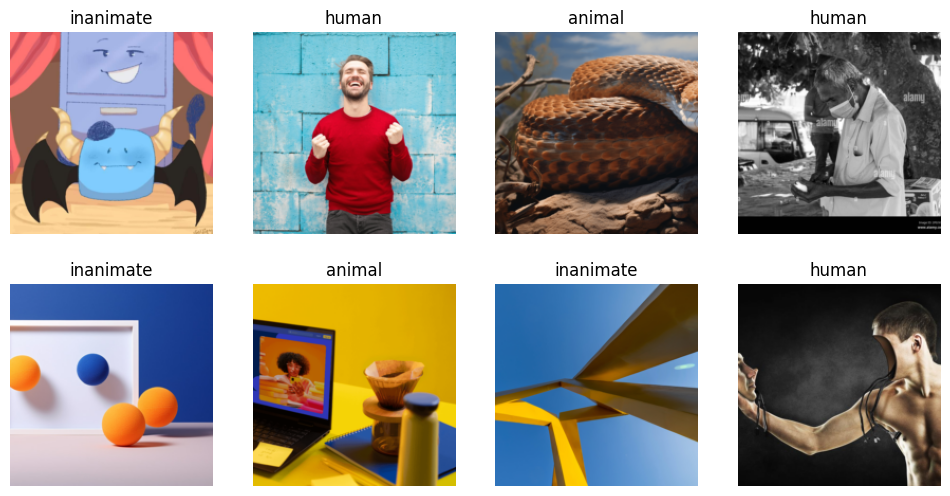

In [8]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=Resize(192)
).dataloaders(path, bs=32)

dls.show_batch(max_n=8)

In [9]:
#train the model
#learn = vision_learner(dls, resnet18, metrics=accuracy)
learn = vision_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 131MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,2.129323,0.892270,0.717391,01:12


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,time
0,0.813777,0.539382,0.804348,01:31
1,0.589114,0.535232,0.858696,01:22
2,0.432782,0.586323,0.880435,01:24
3,0.346865,0.623465,0.880435,01:22
4,0.282349,0.636151,0.869565,01:22


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in by

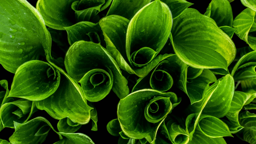

In [10]:
download_url(search_images('plant photos', max_images=1)[0], 'plant.jpg', show_progress=False)
Image.open('plant.jpg').to_thumb(256,256)

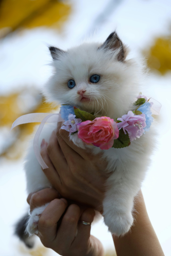

In [11]:
download_url(search_images('cat photos', max_images=1)[0], 'cat.jpg', show_progress=False)
Image.open('cat.jpg').to_thumb(256,256)

In [12]:
#Validating the model with plant and cat images

#img = PILImage.create('plant.jpg')
#label, idx, probs = learn.predict(img)

#print(f"Predicted: {label}")
#print(f"Confidence: {probs[idx]:.4f}")

test_imgs = ['plant.jpg', 'cat.jpg']
for fname in test_imgs:
    img = PILImage.create(fname)
    label, _, probs = learn.predict(img)
    print(f"{fname} ➤ {label} ({probs.max():.2%})")

plant.jpg ➤ plant (97.37%)


cat.jpg ➤ animal (88.80%)


In [13]:
#Validating the model with series of pictures

test_queries = ['cat photo', 'plant photo', 'human face', 'inanimate object']

for q in test_queries:
    # Search and download one image
    url = search_images(q, max_images=1)[0]
    dest = f"test_{q.replace(' ', '_')}.jpg"
    download_url(url, dest, show_progress=False)

    # Run prediction
    img = PILImage.create(dest)
    label, _, probs = learn.predict(img)
    print(f"{q} ➤ {label} ({probs.max():.2%})")

cat photo ➤ animal (88.42%)


plant photo ➤ inanimate (94.46%)


human face ➤ human (99.90%)


inanimate object ➤ inanimate (94.90%)


It seems the model has a bias with papers, papers with writings etc. and sometimes can identify them as human. It could be due to image sets containing paper with humans  
The following does a texting to show that!

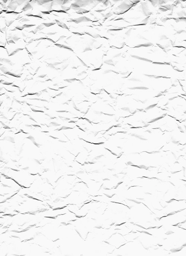

In [14]:
download_url(search_images('paper photos', max_images=30)[10], 'random_picture.jpg', show_progress=False)
#download_url(search_images('box photos', max_images=50)[10], 'random_picture.jpg', show_progress=False)
Image.open('random_picture.jpg').to_thumb(256,256)

In [15]:
label, _, probs = learn.predict(PILImage.create('random_picture.jpg'))
print(f"{q} ➤ {label} ({probs.max():.2%})")
print(f"Prediction: {label}")
print(f"Probabilities: {probs}")

inanimate object ➤ human (50.26%)
Prediction: human
Probabilities: tensor([0.2392, 0.5026, 0.0531, 0.2052])
